<a href="https://colab.research.google.com/github/ewruiofsd/AI-Assignment/blob/main/%5BAI2025_Assignment%5D_Classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignments

The assignment of using the chemical composition data of wine to freely train your own classification model among several classifications to identify the type of wine and to check the accuracy of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Data load and Preprocessing

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

##Inspecting Data and Splitting Train_set, Test_set

* test_size = 0.3
* Check how the data is organized through print(wine['DESCR'])

In [3]:
# Check the Dataset Descriptions
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


### Please define X and Y to predict `class` through `wine_df`.

In [5]:
wine_df = pd.DataFrame(wine['data'], columns=wine.feature_names)
wine_df['class'] = wine.target

# Setting X, Y
X = wine_df[wine.feature_names]
Y = wine_df['class']

In [6]:
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [7]:
print(Y.head())
print(Y.tail())

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64
173    2
174    2
175    2
176    2
177    2
Name: class, dtype: int64



Null Check:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64


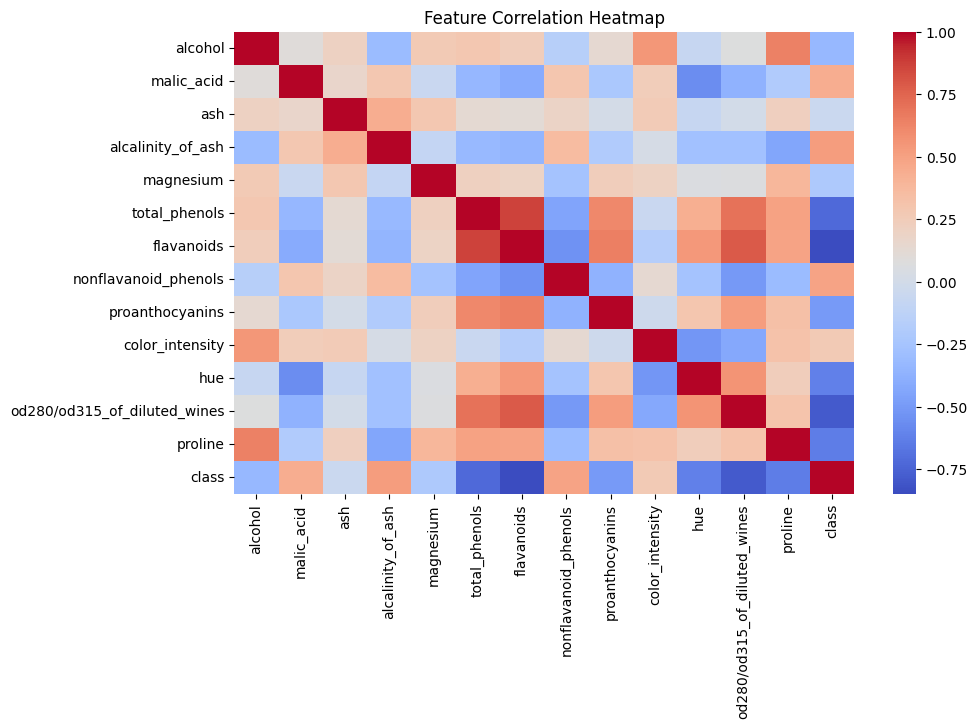

In [8]:
################### Freely Preprocess (Scaling MUST be done after splitting train/test!) ######################

# Check for null values
print("\nNull Check:\n", wine_df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

X = wine_df[wine.feature_names]
Y = wine_df['class']

### Split train and test data through `train_test_split`.
- test_size = 0.3, random_state = 0

In [9]:
from sklearn.model_selection import train_test_split

# Splitting Train/Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

In [10]:
###### Freely Preprocessing 2 : Scaling ( After splitting; Data Leakage) #######
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Build Models Using Various Models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate Model
model = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=6)

# Fitting
model.fit(X_train, Y_train)

# Get predict value by predicting with test data
Y_predict = model.predict(X_test)

##Check the fitted model's performance


In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Print the Accuracy.

In [13]:
# model accuarcy
accuracy = model.score(X_test, Y_test)
print("Accuracy: {0:.3f}".format(accuracy))

Accuracy: 1.000


## Grading

- Accuracy >= 95 : **50 pt(Perfect)**
- Accuracy >= 93, < 95 : **45 pt**
- Accuracy >= 90, < 93 : **40 pt**
- Accuracy < 90 : **35 pt**